Results evaluation for the (1 + 1) - ES

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set(font = "arial")

_mu = "\u03BC"
_lam = "\u03BB"
_sig = "\u03C3"

Compare convergence of the functions

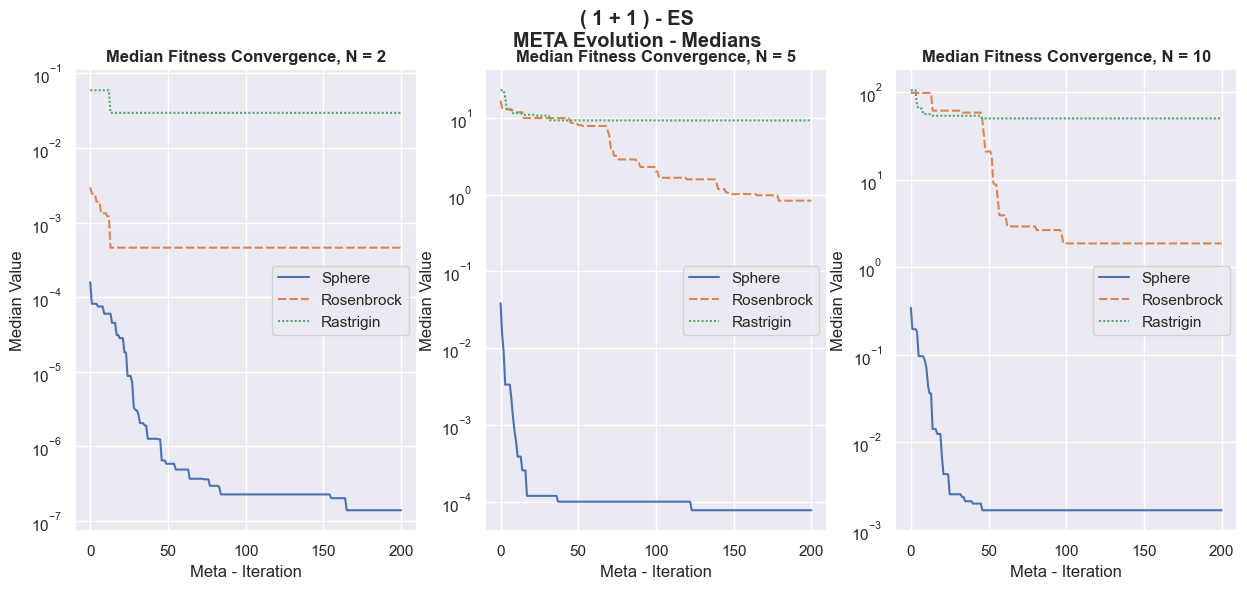

In [14]:

df_r = pd.DataFrame()
FUNC_NAMES = ["Sphere", "Rosenbrock", "Rastrigin"]
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f"( 1 + 1 ) - ES" + "\n" + "META Evolution - Medians",
             fontweight="bold")
i = 0
for n in [2, 5, 10]:
    ax = axs[i]
    i += 1
    df_r = pd.DataFrame()
    for f in [0, 1, 2]:
        path = os.path.join(os.getcwd(), "one_one_es_meta")
        filename = f"one_one_es_meta_F_{f}_n_{n}.csv"
        path = os.path.join(path,filename)
        df = pd.read_csv(path)
        df_r[FUNC_NAMES[f]] = df["medians"]

    ax = sns.lineplot(data=df_r, ax=ax)
    ax.set_yscale("log")
    ax.set_xlabel("Meta - Iteration")
    ax.set_ylabel("Median Value")
    ax.set_title(f"Median Fitness Convergence, N = {n}", fontweight="bold")


# Analysis of Restart 

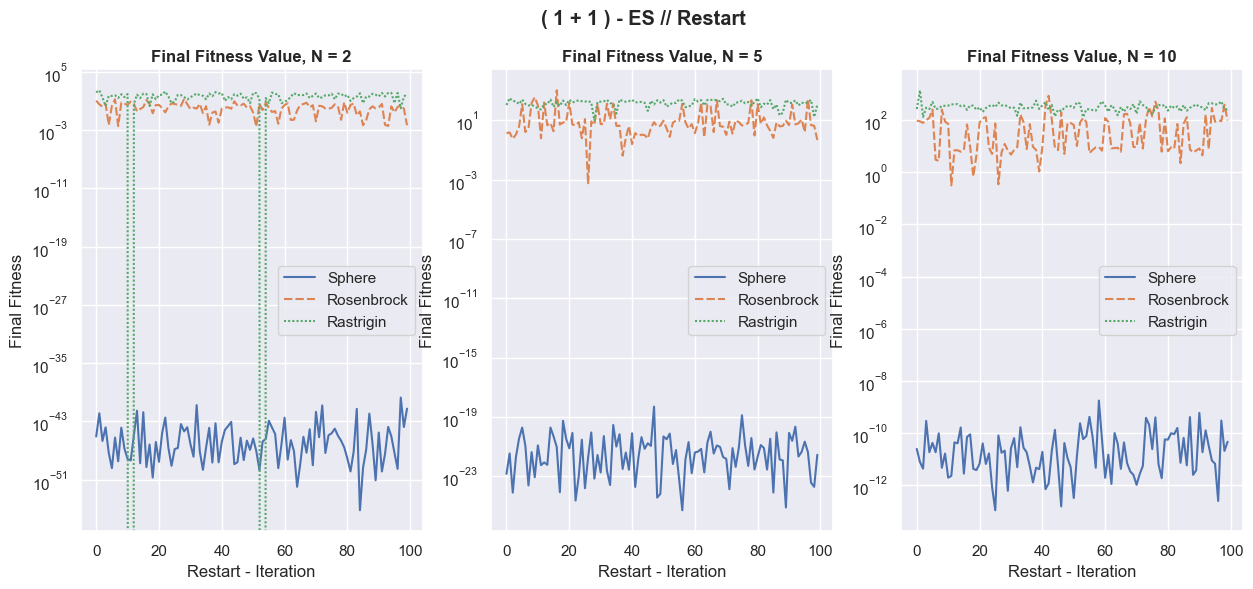

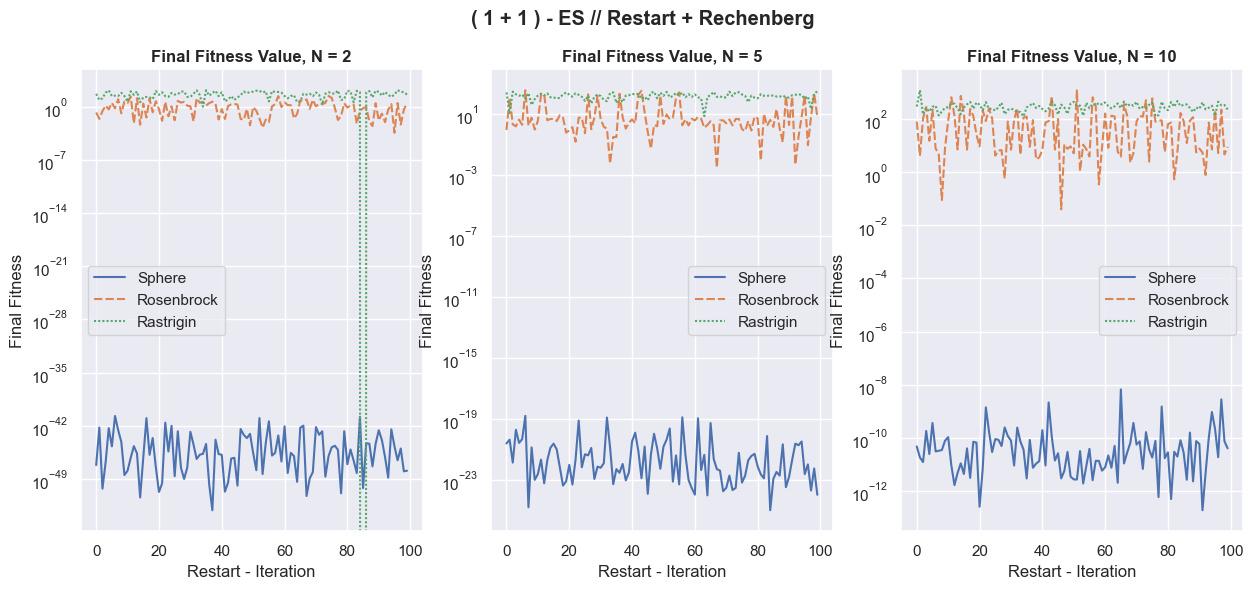

In [15]:
df_r = pd.DataFrame()
FUNC_NAMES = ["Sphere", "Rosenbrock", "Rastrigin"]

for rech in ["", "_rech"]:
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))
    if rech == "_rech":
        fig.suptitle(f"( 1 + 1 ) - ES" + " // " + "Restart + Rechenberg",
                fontweight="bold")
    else:
        fig.suptitle(f"( 1 + 1 ) - ES" + " // " + "Restart",
                fontweight="bold")
    i = 0
    for n in [2, 5, 10]:
        ax = axs[i]
        i += 1
        df_r = pd.DataFrame()
        for f in [0, 1, 2]:
            path = os.path.join(os.getcwd(), "one_one_es_restart")
            filename = f"one_one_es_restart_F_{f}_n_{n}{rech}.csv"
            path = os.path.join(path,filename)
            df = pd.read_csv(path)
            df_r[FUNC_NAMES[f]] = df["final_conv"]

        ax = sns.lineplot(data=df_r, ax=ax)
        ax.set_yscale("log")
        ax.set_xlabel("Restart - Iteration")
        ax.set_ylabel("Final Fitness")
        ax.set_title(f"Final Fitness Value, N = {n}", fontweight="bold")
    fig.show()


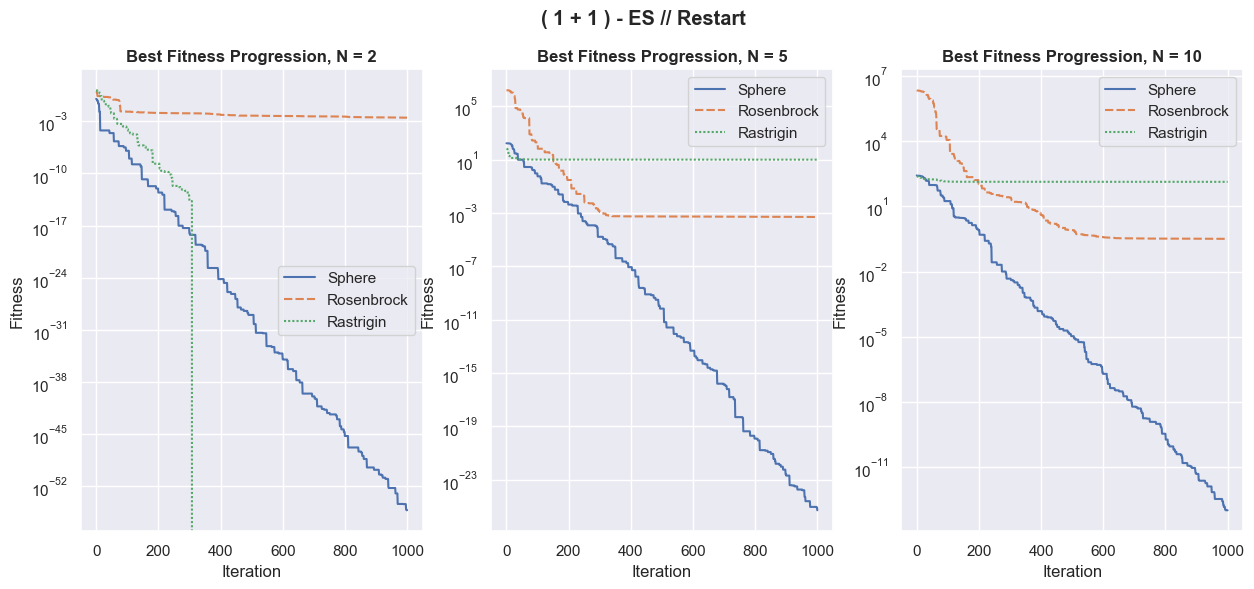

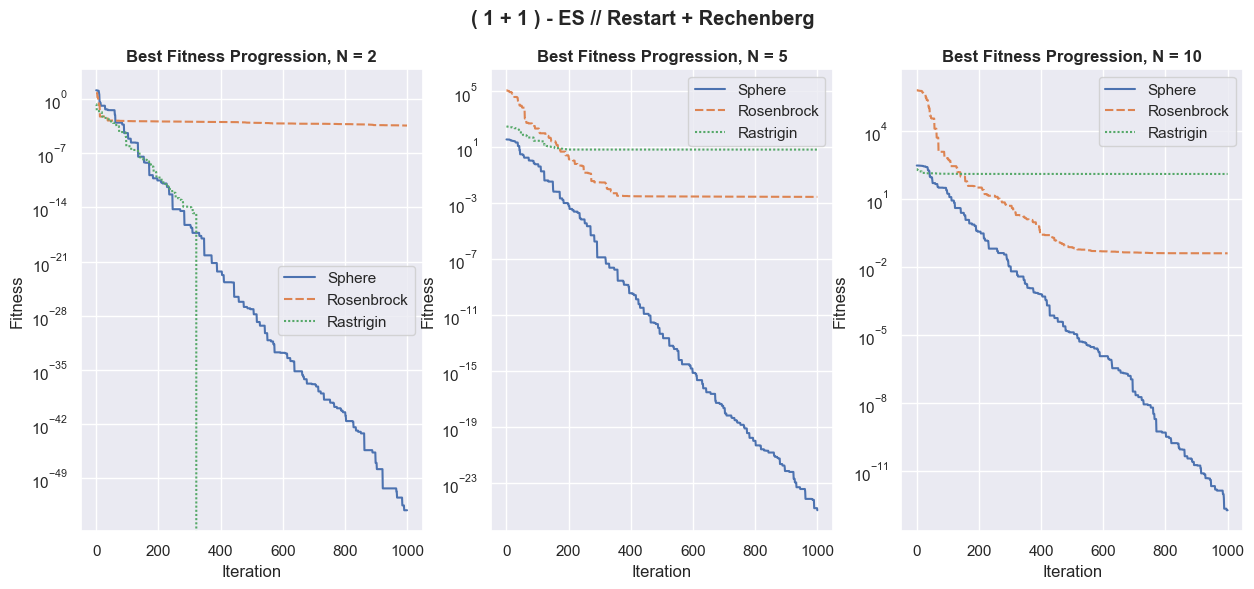

In [16]:
for rech in ["", "_rech"]:
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))
    if rech == "_rech":
        fig.suptitle(f"( 1 + 1 ) - ES" + " // " + "Restart + Rechenberg",
                fontweight="bold")
    else:
        fig.suptitle(f"( 1 + 1 ) - ES" + " // " + "Restart",
                fontweight="bold")
    i = 0
    for n in [2, 5, 10]:
        ax = axs[i]
        i += 1
        df_r = pd.DataFrame()
        for f in [0, 1, 2]:
            path = os.path.join(os.getcwd(), "one_one_es_restart")
            filename = f"results_one_one_es_restart_F_{f}_n_{n}{rech}.csv"
            path = os.path.join(path,filename)
            df = pd.read_csv(path)
            df_r[FUNC_NAMES[f]] = df["0"]

        ax = sns.lineplot(data=df_r, ax=ax)
        ax.set_yscale("log")
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Fitness")
        ax.set_title(f"Best Fitness Progression, N = {n}", fontweight="bold")
    fig.show()

# Evaluate the Results of the CMAES Python package

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 5 (seed=463206, Wed Mar  8 19:17:46 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      8 1.805734983744320e+01 1.0e+00 9.83e-01  9e-01  1e+00 0:00.0
    2     16 5.354285998670370e+00 1.3e+00 1.15e+00  1e+00  1e+00 0:00.0
    3     24 2.515696067892176e+00 1.3e+00 1.22e+00  1e+00  1e+00 0:00.0
  100    800 1.356641705259679e-11 1.7e+00 4.08e-05  2e-06  2e-06 0:00.2
  135   1080 3.838039939487178e-14 2.1e+00 4.71e-06  1e-07  1e-07 0:00.2
termination on tolfun=1e-11 (Wed Mar  8 19:17:47 2023)
final/bestever f-value = 2.796205e-14 1.996011e-14 after 1081/1071 evaluations
incumbent solution: [5.158038196812833e-08, -7.773520452039371e-08, -5.403304056161539e-08, -7.00585091829471e-08, 1.0691580909808242e-07]
std deviation: [1.1431520924131064e-07, 1.083021343843483e-07, 1.039426772502464e-07, 9.502979382737104e-08, 1.0669929704623277e-07]


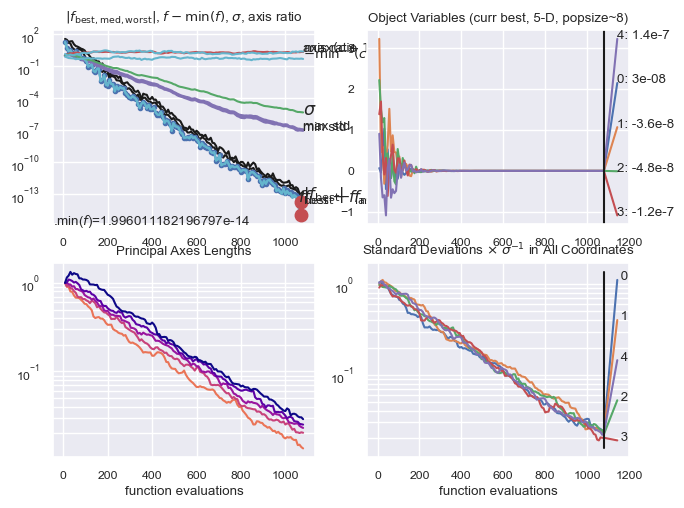

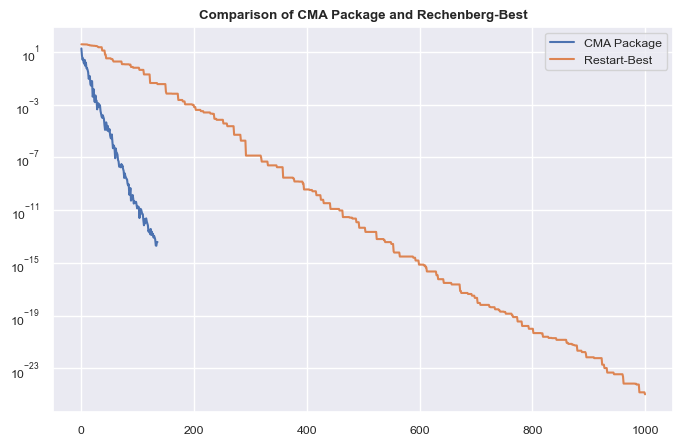

In [37]:
import cma
import numpy as np
sns.set(font_scale=0.8)
# Define the function locally for comparison

def sphere(x):
    return sum([x*x for x in x])

# Starting Parameters
N = 5 #2, 5, 10
x0 = N*[2]  # Starting point (not random)
sigma0 = 1  # Starting Sigma

xopt, es = cma.fmin2(sphere, x0, sigma0)

es.plot()

log = es.logger # here are the results saved 

#fetch the data of the "restart" using Rechenberg from the file
#( 1 + 1 ) - ES" + " // " + "Restart + Rechenberg",
rech = "_rech"
n = N
df_r = pd.DataFrame()
f= 0
path = os.path.join(os.getcwd(), "one_one_es_restart")
filename = f"results_one_one_es_restart_F_{f}_n_{n}{rech}.csv"
path = os.path.join(path,filename)
df = pd.read_csv(path)
df_r["Restart"] = df["0"]

# Plot a comparison
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.transpose(log.x)[4])
ax.plot(df_r["Restart"])
ax.set_yscale("log")
ax.set_title("Comparison of CMA Package and Rechenberg-Best", fontweight="bold")
plt.gca().legend(('CMA Package','Restart-Best',))